In [ ]:
# import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pprint import pprint
from time import time
from scipy.stats import kruskal
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from datetime import datetime
import statsmodels.api as sa
import statsmodels.formula.api as sm
from scipy.stats import f_oneway
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
%matplotlib inline

# 1. Cleaning Data

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load tiap data menggunakan bantuan pandas
data = pd.read_excel('Final_Projek.inate.xlsx')

In [ ]:
# tampilkan jumlah baris dan data
data.shape

(11083, 7)

###**Duplikasi Data**



In [ ]:
# lihat informasi dari sumber data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11083 entries, 0 to 11082
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_ujian       11083 non-null  object        
 1   id_peserta     11083 non-null  object        
 2   ujian_dimulai  11083 non-null  datetime64[ns]
 3   ujian_ditutup  11083 non-null  datetime64[ns]
 4   jenis_tes      11083 non-null  object        
 5   timestamp_log  9194 non-null   datetime64[ns]
 6   pesan_log      9194 non-null   object        
dtypes: datetime64[ns](3), object(4)
memory usage: 606.2+ KB


In [ ]:
# apakah terdapat duplikat di sumber data
print(f"terdapat {data.duplicated().sum()} baris duplikat")

terdapat 55 baris duplikat


In [ ]:
# hapus data duplikat
data = data.drop_duplicates().reset_index(drop=True)

In [ ]:
# cek apakah kita sudah berhasil menghapus data duplikat
print(f"terdapat {data.duplicated().sum()} baris duplikat")

terdapat 0 baris duplikat


### Missing Value

In [ ]:
# mari kita cek jumlah missing value
data.isna().sum()

id_ujian            0
id_peserta          0
ujian_dimulai       0
ujian_ditutup       0
jenis_tes           0
timestamp_log    1889
pesan_log        1889
dtype: int64

In [ ]:
# Menghitung nilai median
median_value = data['timestamp_log'].median()

In [ ]:
# Mengisi nilai yang hilang dengan nilai median
data['timestamp_log'].fillna(median_value, inplace=True)

In [ ]:
# cek jumlah missing value
data.isna().sum()

id_ujian            0
id_peserta          0
ujian_dimulai       0
ujian_ditutup       0
jenis_tes           0
timestamp_log       0
pesan_log        1889
dtype: int64

In [ ]:
# Menghitung nilai modus kategorikal
modus_value = data['pesan_log'].mode()[0]

In [ ]:
# Mengisi nilai yang hilang dengan nilai modus
data['pesan_log'].fillna(modus_value, inplace=True)

In [ ]:
# cek kembali jumlah missing value
data.isna().sum()

id_ujian         0
id_peserta       0
ujian_dimulai    0
ujian_ditutup    0
jenis_tes        0
timestamp_log    0
pesan_log        0
dtype: int64

In [ ]:
# tampilkan 10 baris pertama
data.head(10)

,id_ujian,id_peserta,ujian_dimulai,ujian_ditutup,jenis_tes,timestamp_log,pesan_log
0,29fbeda12fc84baaab209699439aba09,982b41ef78bcc73e9dcbb9110afce55b,2022-06-07 15:52:00,2022-06-09 21:00:00,Bidang Studi,2022-06-08 19:29:34,Selesai Tes Bidang Studi
1,29fbeda12fc84baaab209699439aba09,982b41ef78bcc73e9dcbb9110afce55b,2022-06-07 15:52:00,2022-06-09 21:00:00,Bidang Studi,2022-06-08 19:15:02,Memulai Tes Bidang Studi
2,e82a71007130c199a90961842d15b339,9f2de4269e67bd7e3d837026252a4bfb,2022-09-08 10:30:00,2022-09-09 10:30:00,Kemampuan Visual Spasial,2022-09-08 22:01:11,Selesai Tes Kemampuan Visual Spasial
3,e82a71007130c199a90961842d15b339,9f2de4269e67bd7e3d837026252a4bfb,2022-09-08 10:30:00,2022-09-09 10:30:00,Kemampuan Visual Spasial,2022-09-08 21:49:11,Memulai Tes Kemampuan Visual Spasial
4,8489127cbef60df4ff9aaeda12eeb327,b0afe01565fd69bc0c045ef84abc848e,2022-06-15 21:30:00,2022-06-16 23:59:00,Bidang Studi,2022-07-05 20:22:25,Memulai Tes Penalaran Matematika
5,0b97e22ca7c95fdf86d97f10abd7a6c3,b88d2688d72b74a5723da96f9fa8a772,2022-06-03 23:24:00,2022-06-04 23:59:00,Kemampuan Bahasa Inggris,2022-06-04 19:02:00,Selesai Tes Kemampuan Bahasa Inggris
6,0b97e22ca7c95fdf86d97f10abd7a6c3,b88d2688d72b74a5723da96f9fa8a772,2022-06-03 23:24:00,2022-06-04 23:59:00,Kemampuan Bahasa Inggris,2022-06-04 19:02:00,Selesai Bagian 3 Tes Kemampuan Bahasa Inggris
7,0b97e22ca7c95fdf86d97f10abd7a6c3,b88d2688d72b74a5723da96f9fa8a772,2022-06-03 23:24:00,2022-06-04 23:59:00,Kemampuan Bahasa Inggris,2022-06-04 18:52:03,Memulai Bagian 3 Tes Kemampuan Bahasa Inggris
8,0b97e22ca7c95fdf86d97f10abd7a6c3,b88d2688d72b74a5723da96f9fa8a772,2022-06-03 23:24:00,2022-06-04 23:59:00,Kemampuan Bahasa Inggris,2022-06-04 18:52:03,Selesai Bagian 2 Tes Kemampuan Bahasa Inggris
9,0b97e22ca7c95fdf86d97f10abd7a6c3,b88d2688d72b74a5723da96f9fa8a772,2022-06-03 23:24:00,2022-06-04 23:59:00,Kemampuan Bahasa Inggris,2022-06-04 18:41:40,Memulai Bagian 2 Tes Kemampuan Bahasa Inggris


###**Typo**

In [ ]:
data["ujian_dimulai"].unique() #tidak ada bulan dan tanggal yang mustahil ada.

array(['2022-06-07T15:52:00.000000000', '2022-09-08T10:30:00.000000000',
       '2022-06-15T21:30:00.000000000', '2022-06-03T23:24:00.000000000',
       '2022-08-05T13:00:00.000000000', '2022-07-01T14:15:00.000000000',
       '2022-08-07T16:00:00.000000000', '2022-07-11T09:01:00.000000000',
       '2022-06-09T09:00:00.000000000', '2022-04-07T08:00:00.000000000',
       '2022-06-09T22:36:00.000000000', '2022-07-22T07:00:00.000000000',
       '2022-07-04T09:02:00.000000000', '2022-06-03T23:27:00.000000000',
       '2022-07-04T05:00:00.000000000', '2022-08-08T15:03:00.000000000',
       '2022-07-29T14:24:00.000000000', '2022-07-23T09:00:00.000000000',
       '2022-06-03T23:30:00.000000000', '2022-06-20T15:26:00.000000000',
       '2022-05-29T09:00:00.000000000', '2022-09-03T12:00:00.000000000',
       '2022-07-19T05:00:00.000000000', '2022-07-04T13:00:00.000000000',
       '2022-06-06T11:00:00.000000000', '2022-06-09T15:18:00.000000000',
       '2022-06-22T16:00:00.000000000', '2022-07-11

In [ ]:
data["ujian_ditutup"].unique() #tidak ada bulan dan tanggal yang mustahil ada.

array(['2022-06-09T21:00:00.000000000', '2022-09-09T10:30:00.000000000',
       '2022-06-16T23:59:00.000000000', '2022-06-04T23:59:00.000000000',
       '2022-08-06T08:00:00.000000000', '2022-07-02T08:30:00.000000000',
       '2022-08-08T23:00:00.000000000', '2022-08-09T09:01:00.000000000',
       '2022-06-10T09:00:00.000000000', '2022-06-08T06:00:00.000000000',
       '2022-06-10T17:00:00.000000000', '2022-07-24T23:59:00.000000000',
       '2022-07-04T23:59:00.000000000', '2022-07-05T23:59:00.000000000',
       '2022-09-04T15:03:00.000000000', '2022-07-31T12:00:00.000000000',
       '2022-07-23T12:00:00.000000000', '2022-06-21T15:26:00.000000000',
       '2022-05-29T12:00:00.000000000', '2022-09-03T22:00:00.000000000',
       '2022-07-20T23:59:00.000000000', '2022-07-05T13:00:00.000000000',
       '2022-06-06T23:00:00.000000000', '2022-06-09T20:00:00.000000000',
       '2022-06-23T23:59:00.000000000', '2022-07-13T23:59:00.000000000',
       '2022-06-15T18:33:48.000000000', '2022-09-11

In [ ]:
data["jenis_tes"].unique() #tidak ada typo

array(['Bidang Studi', 'Kemampuan Visual Spasial',
       'Kemampuan Bahasa Inggris', 'Penalaran Matematika',
       'Literasi Bahasa Indonesia'], dtype=object)

In [ ]:
data["timestamp_log"].unique() #tidak ada typo (dilihat dari excel)

array(['2022-06-08T19:29:34.000000000', '2022-06-08T19:15:02.000000000',
       '2022-09-08T22:01:11.000000000', ...,
       '2022-09-08T14:28:55.000000000', '2022-06-29T14:13:46.000000000',
       '2022-06-29T13:59:40.000000000'], dtype='datetime64[ns]')

In [ ]:
data["pesan_log"].value_counts() #tidak ada typo

Memulai Tes Penalaran Matematika                  2609
Selesai Tes Penalaran Matematika                   704
Memulai Tes Bidang Studi                           702
Selesai Tes Bidang Studi                           670
Memulai Tes Kemampuan Bahasa Inggris               580
Memulai Bagian 1 Tes Kemampuan Bahasa Inggris      574
Selesai Tes Kemampuan Bahasa Inggris               573
Selesai Bagian 1 Tes Kemampuan Bahasa Inggris      572
Memulai Bagian 2 Tes Kemampuan Bahasa Inggris      572
Selesai Bagian 3 Tes Kemampuan Bahasa Inggris      571
Selesai Bagian 2 Tes Kemampuan Bahasa Inggris      570
Memulai Bagian 3 Tes Kemampuan Bahasa Inggris      569
Memulai Tes Kemampuan Visual Spasial               276
Selesai Tes Kemampuan Visual Spasial               263
Memulai Tes Literasi Bahasa Indonesia              150
Memulai Bagian 1 Tes Literasi Bahasa Indonesia     148
Selesai Bagian 1 Tes Literasi Bahasa Indonesia     148
Memulai Bagian 2 Tes Literasi Bahasa Indonesia     147
Selesai Te

In [ ]:
# melihat apakah ada durasi ujian yang valuenya negatif
waktu_pengerjaan = data["ujian_ditutup"]-data["ujian_dimulai"]
negatif = waktu_pengerjaan[waktu_pengerjaan < pd.Timedelta(0)]
print(negatif)

102     -1 days +01:39:48
1927    -1 days +13:01:06
2020    -1 days +13:01:06
2229    -1 days +01:39:48
2924    -1 days +22:55:51
3903    -1 days +22:55:51
4335    -3 days +09:21:08
5111    -3 days +09:21:08
5431    -1 days +22:55:51
6168    -3 days +09:21:08
6883    -3 days +09:21:08
7632    -1 days +22:55:51
9291    -1 days +13:01:06
10350   -1 days +01:39:48
dtype: timedelta64[ns]


In [ ]:
# melihat kolom id_peserta yang value durasi tesnya negatif
negatif_value = waktu_pengerjaan[waktu_pengerjaan < pd.Timedelta(0)]
negatif_row = data.loc[negatif_value.index]
negatif_id = negatif_row["id_peserta"]
print(negatif_id)


102      7d914450e410e25a3e7cfeceae68c63d
1927     af851061344a0becc3d029622700c4c6
2020     af851061344a0becc3d029622700c4c6
2229     7d914450e410e25a3e7cfeceae68c63d
2924     6dda176ad12231f0ac24d8126c2f1239
3903     6dda176ad12231f0ac24d8126c2f1239
4335     eded70d526105028824457b08d3be0f2
5111     eded70d526105028824457b08d3be0f2
5431     6dda176ad12231f0ac24d8126c2f1239
6168     eded70d526105028824457b08d3be0f2
6883     eded70d526105028824457b08d3be0f2
7632     6dda176ad12231f0ac24d8126c2f1239
9291     af851061344a0becc3d029622700c4c6
10350    7d914450e410e25a3e7cfeceae68c63d
Name: id_peserta, dtype: object


In [ ]:
# hapus baris yang value durasi tesnya negatif
negatif_value = waktu_pengerjaan[waktu_pengerjaan < pd.Timedelta(0)]
negatif_indices = negatif_value.index

data.drop(negatif_indices, inplace=True)

removed_ids = negatif_row["id_peserta"]
print("Removed IDs:", removed_ids)


Removed IDs: 102      7d914450e410e25a3e7cfeceae68c63d
1927     af851061344a0becc3d029622700c4c6
2020     af851061344a0becc3d029622700c4c6
2229     7d914450e410e25a3e7cfeceae68c63d
2924     6dda176ad12231f0ac24d8126c2f1239
3903     6dda176ad12231f0ac24d8126c2f1239
4335     eded70d526105028824457b08d3be0f2
5111     eded70d526105028824457b08d3be0f2
5431     6dda176ad12231f0ac24d8126c2f1239
6168     eded70d526105028824457b08d3be0f2
6883     eded70d526105028824457b08d3be0f2
7632     6dda176ad12231f0ac24d8126c2f1239
9291     af851061344a0becc3d029622700c4c6
10350    7d914450e410e25a3e7cfeceae68c63d
Name: id_peserta, dtype: object


###**Outlier**

In [ ]:
# Analisis dan Identifikasi Outlier
# Menkonversi kolom timestamp_log menjadi tipe data datetime terlebih dahulu
data['timestamp_log'] = pd.to_datetime(data['timestamp_log'])

In [ ]:
# Menganalisis kolom-kolom yang relevan, seperti durasi pengerjaan tes.
# Hitung durasi pengerjaan tes
data['durasi_tes'] = (data['ujian_ditutup'] - data['ujian_dimulai']).dt.total_seconds()

In [ ]:
data["durasi_tes"].value_counts()

86400.0      1280
154740.0     1048
10800.0       279
172800.0      261
174925.0      234
             ... 
111960.0        1
36180.0         1
381540.0        1
1296000.0       1
172860.0        1
Name: durasi_tes, Length: 387, dtype: int64

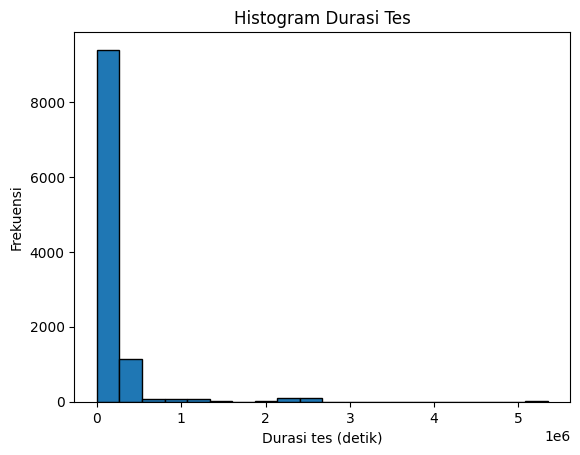

In [ ]:
# Analisis durasi pengerjaan tes
plt.hist(data['durasi_tes'], bins=20, edgecolor='black')
plt.title('Histogram Durasi Tes')
plt.xlabel('Durasi tes (detik)')
plt.ylabel('Frekuensi')
plt.show()


In [ ]:
# membuat fungsi cek outlier.
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(data[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(data[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
      bound = np.where(data[nama_kolom] >= (Q3 + 1.5*IQR))
  elif batas == 'lower_bound':
      bound = np.where(data[nama_kolom] <= (Q1 - 1.5*IQR))
  return list(bound[0])

In [ ]:
#durasi_tes
upper_durasi_tes = cek_outlier('durasi_tes', 'upper_bound')
lower_durasi_tes = cek_outlier('durasi_tes', 'lower_bound')
print(f"Jumlah total outlier di kolom durasi_tes : {len(upper_durasi_tes) + len(lower_durasi_tes)}")

#ujian_dimulai
upper_ujian_dimulai = cek_outlier('ujian_dimulai', 'upper_bound')
lower_ujian_dimulai = cek_outlier('ujian_dimulai', 'lower_bound')
print(f"Jumlah total outlier di kolom ujian_dimulai : {len(upper_ujian_dimulai) + len(lower_ujian_dimulai)}")

#ujian_ditutup
upper_ujian_ditutup = cek_outlier('ujian_ditutup', 'upper_bound')
lower_ujian_ditutup = cek_outlier('ujian_ditutup', 'lower_bound')
print(f"Jumlah total outlier di kolom ujian_ditutup : {len(upper_ujian_ditutup) + len(lower_ujian_ditutup)}")

Jumlah total outlier di kolom durasi_tes : 1081
Jumlah total outlier di kolom ujian_dimulai : 293
Jumlah total outlier di kolom ujian_ditutup : 254


In [ ]:
def filter_outliers(df, nama_kolom):
    if nama_kolom == 'durasi_tes':
        data_temp = df.loc[~df.index.isin(upper_durasi_tes)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_durasi_tes)]
        return data_temp
    if nama_kolom == 'ujian_dimulai':
        data_temp = df.loc[~df.index.isin(upper_ujian_dimulai)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_ujian_dimulai)]
        return data_temp
    if nama_kolom == 'ujian_ditutup':
        data_temp = df.loc[~df.index.isin(upper_ujian_ditutup)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_ujian_ditutup)]
        return data_temp

In [ ]:
columns_to_filter = ['durasi_tes', 'ujian_dimulai', 'ujian_ditutup']
data_final = data.copy()
for column in columns_to_filter:
    data_final = filter_outliers(data_final, column)

print(data_final.shape)

(9664, 8)


# TINGKAT PENYELESAIAN

In [ ]:
data_final["pesan_log"].value_counts()

Memulai Tes Penalaran Matematika                  2268
Selesai Tes Penalaran Matematika                   613
Memulai Tes Bidang Studi                           609
Selesai Tes Bidang Studi                           581
Selesai Bagian 2 Tes Kemampuan Bahasa Inggris      509
Selesai Bagian 1 Tes Kemampuan Bahasa Inggris      509
Selesai Bagian 3 Tes Kemampuan Bahasa Inggris      507
Memulai Bagian 3 Tes Kemampuan Bahasa Inggris      507
Memulai Bagian 1 Tes Kemampuan Bahasa Inggris      507
Selesai Tes Kemampuan Bahasa Inggris               506
Memulai Tes Kemampuan Bahasa Inggris               506
Memulai Bagian 2 Tes Kemampuan Bahasa Inggris      505
Memulai Tes Kemampuan Visual Spasial               238
Selesai Tes Kemampuan Visual Spasial               224
Selesai Tes Literasi Bahasa Indonesia              130
Memulai Tes Literasi Bahasa Indonesia              130
Memulai Bagian 3 Tes Literasi Bahasa Indonesia     130
Selesai Bagian 1 Tes Literasi Bahasa Indonesia     129
Selesai Ba

In [ ]:
# Membuat kolom baru status ujian (tanpa melihat bagian tes)
data_final['status_ujian'] = data_final['pesan_log'].apply(lambda x: 'Mengikuti Tes Bidang Studi' if 'memulai tes bidang studi' in x.lower() else 'Selesai Tes Bidang Studi' if 'selesai tes bidang studi' in x.lower()
                                                            else 'Mengikuti Tes Kemampuan Bahasa Inggris' if 'memulai tes kemampuan bahasa inggris' in x.lower() else 'Selesai Tes Kemampuan Bahasa Inggris' if 'selesai tes kemampuan bahasa inggris' in x.lower()
                                                            else 'Mengikuti Tes Kemampuan Visual Spasial' if 'memulai tes kemampuan visual spasial' in x.lower() else 'Selesai Tes Kemampuan Visual Spasial' if 'selesai tes kemampuan visual spasial' in x.lower()
                                                            else 'Mengikuti Tes Literasi Bahasa Indonesia' if 'memulai tes literasi bahasa indonesia' in x.lower() else 'Selesai Tes Literasi Bahasa Indonesia' if 'selesai tes literasi bahasa indonesia' in x.lower()
                                                            else 'Mengikuti Tes Penalaran Matematika' if 'memulai tes penalaran matematika' in x.lower() else 'Selesai Tes Penalaran Matematika' if 'selesai tes penalaran matematika' in x.lower() else 'Lainnya' )

# Menampilkan tingkat penyelesaian ujian
tingkat_penyelesaian = data_final.groupby('status_ujian').size().reset_index(name='Jumlah')

kategori_urutan = [
    'Mengikuti Tes Bidang Studi', 'Selesai Tes Bidang Studi',
    'Mengikuti Tes Kemampuan Bahasa Inggris', 'Selesai Tes Kemampuan Bahasa Inggris',
    'Mengikuti Tes Kemampuan Visual Spasial', 'Selesai Tes Kemampuan Visual Spasial',
    'Mengikuti Tes Literasi Bahasa Indonesia', 'Selesai Tes Literasi Bahasa Indonesia',
    'Mengikuti Tes Penalaran Matematika', 'Selesai Tes Penalaran Matematika', 'Lainnya'
]

# Menggunakan pd.Categorical untuk menetapkan urutan kategori
tingkat_penyelesaian['status_ujian'] = pd.Categorical(tingkat_penyelesaian['status_ujian'], categories=kategori_urutan, ordered=True)

# Mengurutkan DataFrame berdasarkan kategori
tingkat_penyelesaian = tingkat_penyelesaian.sort_values('status_ujian')

print(tingkat_penyelesaian)

                               status_ujian  Jumlah
1                Mengikuti Tes Bidang Studi     609
6                  Selesai Tes Bidang Studi     581
2    Mengikuti Tes Kemampuan Bahasa Inggris     506
7      Selesai Tes Kemampuan Bahasa Inggris     506
3    Mengikuti Tes Kemampuan Visual Spasial     238
8      Selesai Tes Kemampuan Visual Spasial     224
4   Mengikuti Tes Literasi Bahasa Indonesia     130
9     Selesai Tes Literasi Bahasa Indonesia     130
5        Mengikuti Tes Penalaran Matematika    2268
10         Selesai Tes Penalaran Matematika     613
0                                   Lainnya    3859


In [ ]:
# Mengambil data untuk semua tes
semua_tes = tingkat_penyelesaian[tingkat_penyelesaian['status_ujian'].str.contains('Tes Bidang Studi|Tes Kemampuan Bahasa Inggris|Tes Kemampuan Visual Spasial|Tes Literasi Bahasa Indonesia|Tes Penalaran Matematika')]

###**Tes Bidang Studi**

In [ ]:
# Tingkat Penyelesaian Tes Bidang Studi
jumlah_selesai_bidang_studi = semua_tes[semua_tes['status_ujian'] == 'Selesai Tes Bidang Studi']['Jumlah'].sum()
jumlah_memulai_bidang_studi = semua_tes[semua_tes['status_ujian'] == 'Mengikuti Tes Bidang Studi']['Jumlah'].sum()
persentase_penyelesaian_bidang_studi = (jumlah_selesai_bidang_studi / jumlah_memulai_bidang_studi) * 100 if jumlah_memulai_bidang_studi > 0 else 0

# Menampilkan hasil
print("Jumlah 'Selesai Tes Bidang Studi':", jumlah_selesai_bidang_studi)
print("Jumlah 'Mengikuti Tes Bidang Studi':", jumlah_memulai_bidang_studi)
print("Persentase Penyelesaian Tes Bidang Studi:", persentase_penyelesaian_bidang_studi, "%")

Jumlah 'Selesai Tes Bidang Studi': 581
Jumlah 'Mengikuti Tes Bidang Studi': 609
Persentase Penyelesaian Tes Bidang Studi: 95.40229885057471 %


###**Tes Kemampuan Bahasa Inggris**

In [ ]:
# Tingkat Penyelesaian Tes Kemampuan Bahasa Inggris
jumlah_selesai_inggris = semua_tes[semua_tes['status_ujian'] == 'Selesai Tes Kemampuan Bahasa Inggris']['Jumlah'].sum()
jumlah_memulai_inggris = semua_tes[semua_tes['status_ujian'] == 'Mengikuti Tes Kemampuan Bahasa Inggris']['Jumlah'].sum()
persentase_penyelesaian_inggris = (jumlah_selesai_inggris / jumlah_memulai_inggris) * 100 if jumlah_memulai_inggris > 0 else 0

# Menampilkan hasil
print("\nJumlah 'Selesai Tes Kemampuan Bahasa Inggris':", jumlah_selesai_inggris)
print("Jumlah 'Mengikuti Tes Kemampuan Bahasa Inggris':", jumlah_memulai_inggris)
print("Persentase Penyelesaian Tes Kemampuan Bahasa Inggris:", persentase_penyelesaian_inggris, "%")


Jumlah 'Selesai Tes Kemampuan Bahasa Inggris': 506
Jumlah 'Mengikuti Tes Kemampuan Bahasa Inggris': 506
Persentase Penyelesaian Tes Kemampuan Bahasa Inggris: 100.0 %


###**Tes Kemampuan Visual Spasial**

In [ ]:
# Tingkat Penyelesaian Tes Kemampuan Visual Spasial
jumlah_selesai_visual = semua_tes[semua_tes['status_ujian'] == 'Selesai Tes Kemampuan Visual Spasial']['Jumlah'].sum()
jumlah_memulai_visual = semua_tes[semua_tes['status_ujian'] == 'Mengikuti Tes Kemampuan Visual Spasial']['Jumlah'].sum()
persentase_penyelesaian_visual = (jumlah_selesai_visual / jumlah_memulai_visual) * 100 if jumlah_memulai_visual > 0 else 0

# Menampilkan hasil
print("\nJumlah 'Selesai Tes Kemampuan Visual Spasial':", jumlah_selesai_visual)
print("Jumlah 'Mengikuti Tes Kemampuan Visual Spasial':", jumlah_memulai_visual)
print("Persentase Penyelesaian Tes Kemampuan Visual Spasial:", persentase_penyelesaian_visual, "%")


Jumlah 'Selesai Tes Kemampuan Visual Spasial': 224
Jumlah 'Mengikuti Tes Kemampuan Visual Spasial': 238
Persentase Penyelesaian Tes Kemampuan Visual Spasial: 94.11764705882352 %


###**Tes Literasi Bahasa Indonesia**

In [ ]:
# Tingkat Penyelesaian Tes Literasi Bahasa Indonesia
jumlah_selesai_indonesia = semua_tes[semua_tes['status_ujian'] == 'Selesai Tes Literasi Bahasa Indonesia']['Jumlah'].sum()
jumlah_memulai_indonesia = semua_tes[semua_tes['status_ujian'] == 'Mengikuti Tes Literasi Bahasa Indonesia']['Jumlah'].sum()
persentase_penyelesaian_indonesia = (jumlah_selesai_indonesia / jumlah_memulai_indonesia) * 100 if jumlah_memulai_indonesia > 0 else 0

# Menampilkan hasil
print("\nJumlah 'Selesai Tes Literasi Bahasa Indonesia':", jumlah_selesai_indonesia)
print("Jumlah 'Mengikuti Tes Literasi Bahasa Indonesia':", jumlah_memulai_indonesia)
print("Persentase Penyelesaian Tes Literasi Bahasa Indonesia:", persentase_penyelesaian_indonesia, "%")


Jumlah 'Selesai Tes Literasi Bahasa Indonesia': 130
Jumlah 'Mengikuti Tes Literasi Bahasa Indonesia': 130
Persentase Penyelesaian Tes Literasi Bahasa Indonesia: 100.0 %


###**Tes Penalaran Matematika**

In [ ]:
# Tingkat Penyelesaian Tes Penalaran Matematika
jumlah_selesai_penalaran = semua_tes[semua_tes['status_ujian'] == 'Selesai Tes Penalaran Matematika']['Jumlah'].sum()
jumlah_memulai_penalaran = semua_tes[semua_tes['status_ujian'] == 'Mengikuti Tes Penalaran Matematika']['Jumlah'].sum()
persentase_penyelesaian_penalaran = (jumlah_selesai_penalaran / jumlah_memulai_penalaran) * 100 if jumlah_memulai_penalaran > 0 else 0

# Menampilkan hasil
print("\nJumlah 'Selesai Tes Penalaran Matematika':", jumlah_selesai_penalaran)
print("Jumlah 'Mengikuti Tes Penalaran Matematika':", jumlah_memulai_penalaran)
print("Persentase Penyelesaian Tes Penalaran Matematika:", persentase_penyelesaian_penalaran, "%")


Jumlah 'Selesai Tes Penalaran Matematika': 613
Jumlah 'Mengikuti Tes Penalaran Matematika': 2268
Persentase Penyelesaian Tes Penalaran Matematika: 27.028218694885364 %


# 2. Bagaimana gambaran umum tentang tingkat penyelesaian ujian? Apakah terdapat perbedaan tingkat penyelesaian berdasarkan komponen tes?

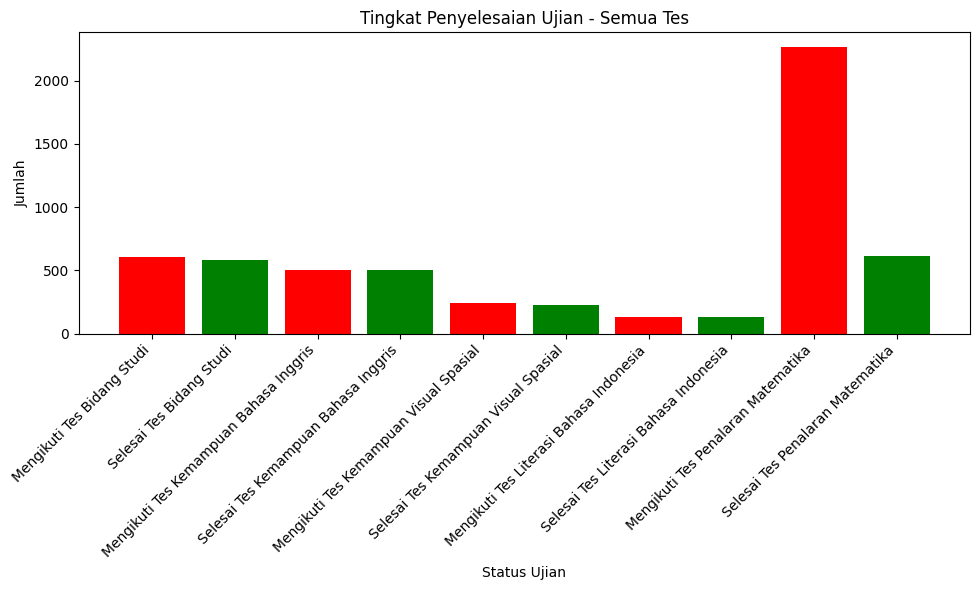

In [ ]:
# Filter data hanya untuk Tes kemampuan bahasa inggris
semua_tes = semua_tes[semua_tes['status_ujian'].str.contains('Tes Bidang Studi|Tes Kemampuan Bahasa Inggris|Tes Kemampuan Visual Spasial|Tes Literasi Bahasa Indonesia|Tes Penalaran Matematika')]

# Membuat daftar warna berdasarkan status ujian
colour = ['red' if 'Mengikuti' in status else 'green' for status in semua_tes['status_ujian']]

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(semua_tes['status_ujian'], semua_tes['Jumlah'], color=colour)
plt.title('Tingkat Penyelesaian Ujian - Semua Tes')
plt.xlabel('Status Ujian')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')  # Optional: Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()
plt.show()


# 3. Bagaimana dengan hari dan waktu pengerjaan rangkaian tes? Apakah calon mahasiswa memiliki preferensi tertentu?

In [ ]:
# Melihat waktu mahasiswa mulai mengerjakan tes
timestamp_memulai = data_final[data_final['pesan_log'].astype(str).str.contains('Memulai Tes Bidang Studi|Memulai Tes Kemampuan Bahasa Inggris|Memulai Tes Kemampuan Visual Spasial|Memulai Tes Literasi Bahasa Indonesia|Memulai Tes Penalaran Matematika', na=False)]['timestamp_log']

# Ambil bagian waktu (time) dari timestamp
time_only = timestamp_memulai.dt.time
time_only_sorted = time_only.sort_values()

# Menampilkan hasil
print(time_only_sorted)

6671    00:01:19
1083    00:04:08
4465    00:07:31
8981    00:08:18
5055    00:15:35
          ...   
9420    23:50:07
5949    23:51:01
5981    23:54:15
7484    23:56:03
9609    23:59:06
Name: timestamp_log, Length: 3751, dtype: object


In [ ]:
# Membuat interval waktu per 3 jam
df_temp = pd.DataFrame({'time_only_sorted': time_only_sorted})

# Ekstraksi jam dari waktu
df_temp['hour'] = df_temp['time_only_sorted'].apply(lambda x: x.hour)

# Membuat interval tiap 3 jam
bins = range(0, 25, 3)

# Menghitung jumlah data dalam setiap interval
interval_counts = pd.cut(df_temp['hour'], bins).value_counts()

most_common_interval = interval_counts.idxmax()
print(f"Interval dengan jumlah waktu terbanyak: {most_common_interval}")
print(f"Jumlah data dalam interval terbanyak: {interval_counts[most_common_interval]}")

# Menampilkan hasil
print(interval_counts)

##jawaban yang benar ada di dashboard

Interval dengan jumlah waktu terbanyak: (18, 21]
Jumlah data dalam interval terbanyak: 2084
(18, 21]    2084
(12, 15]     425
(9, 12]      375
(6, 9]       333
(15, 18]     317
(21, 24]     143
(3, 6]        34
(0, 3]        19
Name: hour, dtype: int64


# 4. Apakah jumlah tes dalam rangkaian ujian mempengaruhi tingkat penyelesaian ujian oleh calon mahasiswa?

In [ ]:
# Mengonversi kolom timestamp menjadi tipe data waktu (datetime).
data_final['ujian_dimulai'] = pd.to_datetime(data_final['ujian_dimulai'])
data_final['ujian_ditutup'] = pd.to_datetime(data_final['ujian_ditutup'])
data_final['timestamp_log'] = pd.to_datetime(data_final['timestamp_log'])

In [ ]:
# Menghitung rata-rata durasi pengerjaan tes untuk setiap jenis tes.
average_duration_per_test = data_final.groupby('jenis_tes')['durasi_tes'].mean()
print(average_duration_per_test)

jenis_tes
Bidang Studi                 187183.802599
Kemampuan Bahasa Inggris     179784.771287
Kemampuan Visual Spasial     315224.586626
Literasi Bahasa Indonesia    206878.797828
Penalaran Matematika         192769.037313
Name: durasi_tes, dtype: float64


In [ ]:
# Penggantian nilai NaN dengan rata-rata
data_final['durasi_tes'].fillna(data_final['durasi_tes'].mean(), inplace=True)

# Cek Tipe Data
data_final['durasi_tes'] = pd.to_numeric(data['durasi_tes'], errors='coerce')

# Penghapusan Baris dengan Nilai NaN
data_final = data_final.dropna(subset=['durasi_tes'])

In [ ]:
descriptive_stats = data_final.groupby('jenis_tes')['durasi_tes'].describe()
print(descriptive_stats)

                            count           mean            std     min  \
jenis_tes                                                                 
Bidang Studi               1616.0  187183.802599  377321.876908     0.0   
Kemampuan Bahasa Inggris   4451.0  179784.771287  308119.532594     0.0   
Kemampuan Visual Spasial    658.0  315224.586626  528725.672322     0.0   
Literasi Bahasa Indonesia  1197.0  206878.797828  436042.119554  1039.0   
Penalaran Matematika       1742.0  192769.037313  348646.676342     0.0   

                               25%       50%       75%        max  
jenis_tes                                                          
Bidang Studi               82800.0  115140.0  174925.0  5349600.0  
Kemampuan Bahasa Inggris   86400.0  144000.0  175195.0  5349600.0  
Kemampuan Visual Spasial   86400.0  121800.0  233940.0  2592060.0  
Literasi Bahasa Indonesia  54000.0   90000.0  172800.0  2592000.0  
Penalaran Matematika       86400.0  125430.0  186465.0  5349600.0 

In [ ]:
# Membandingkan rata-rata durasi pengerjaan tes antar jenis tes.
h_statistic, p_value_kruskal = kruskal(data_final['durasi_tes'][data_final['jenis_tes'] == 'tes1'],
                                        data_final['durasi_tes'][data_final['jenis_tes'] == 'tes2'],
                                        data_final['durasi_tes'][data_final['jenis_tes'] == 'tes3'],
                                        data_final['durasi_tes'][data_final['jenis_tes'] == 'tes4'],
                                        data_final['durasi_tes'][data_final['jenis_tes'] == 'tes5'])

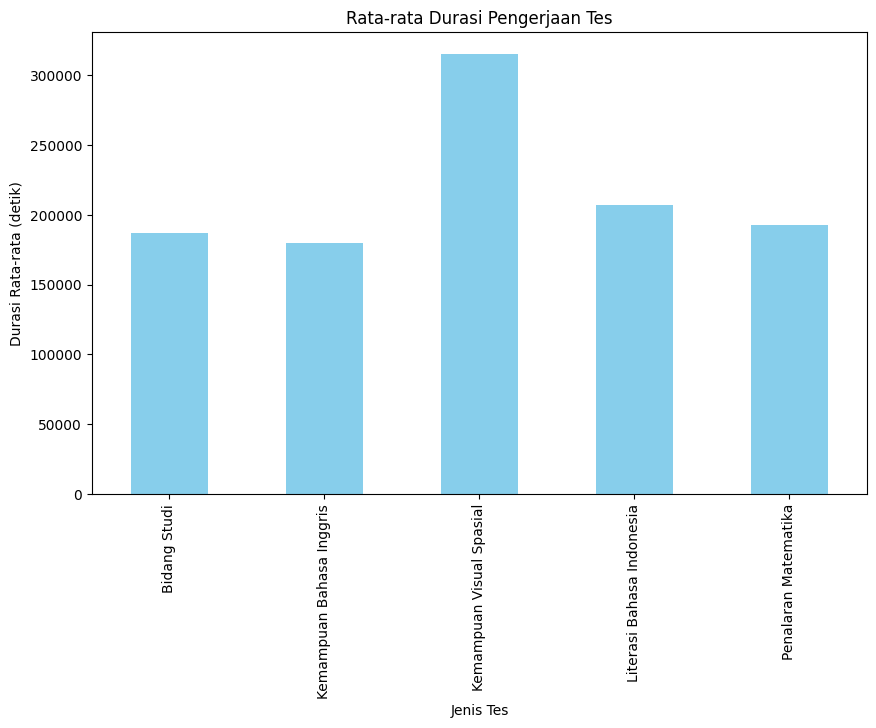

In [ ]:
# Visualisasi rata-rata durasi pengerjaan tes
plt.figure(figsize=(10, 6))
average_duration_per_test.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Durasi Pengerjaan Tes')
plt.xlabel('Jenis Tes')
plt.ylabel('Durasi Rata-rata (detik)')
plt.show()

In [ ]:
# membuat data source baru di excel
df = pd.read_excel('Kesimpulan.xlsx')

In [ ]:
df.head()

,jenis_tes,jumlah_bagian_tes,mengikuti,selesai,tingkat_penyelesaian
0,Bidang Studi,1,609,581,95.402299
1,Kemampuan Bahasa Inggris,7,506,506,100.000000
2,Kemampuan Visual Spasial,1,238,224,94.117647
3,Literasi Bahasa Indonesia,6,130,130,100.000000
4,Penalaran Matematika,1,2268,613,27.028219


In [ ]:
# membuat korelasi
correlation = df['jumlah_bagian_tes'].corr(df['tingkat_penyelesaian'])

# menampilkan hasil
print(f"Korelasi antara jumlah_bagian_tes dan tingkat_penyelesaian: {correlation}")

Korelasi antara jumlah_bagian_tes dan tingkat_penyelesaian: 0.4792576644729291


# 5. Apa saja rekomendasi terkait jumlah rangkaian tes, jenis tes yang digunakan dan periode waktu ujian yang dapat diberikan kepada universitas untuk menaikkan tingkat penyelesaian ujian? *Jawaban ada di DECK*

In [ ]:
# JAWABAN DI DECK